
# 70's A-Z


Last year's XPN A to Z, was so much fun, they are doing again.
This time the [XPN 70's A to Z](http://xpn.org/music-artist/xpn-a-z) playlist is
limited to the 70's but otherwise similar to last year in that it is a
multi-week alphabetical walk though their catalog.
Not only was the music and the [Twitter feed](https://twitter.com/search?q=%23XPNAtoZ) fun,
but so was my side project, [AtoZ](AtoZ.ipynb) notebook,
doing statistical analysis of the playlist.

So, of course, I'm going to try it again.

In [1]:
%matplotlib inline
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide();
    } else {
        $('div.input').show();
    }
        code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Status

- Hoped to add more analysis over the weekend.  Other things took priority.  Hopefully I'll catch up while the countdown is still happening.
- A few people have asked for comparisions with last years AtoZ and other list.
   - Added a simple comparision with last year's countdown
   - Added Comparision with 885 best and 88 worst as well
- Reworked data loading
   - Moved all the work to a seperate page.  Those that are interested can look there, few are.
   - Added caching all around
   - Moved to using the main playlist as the primary source
   - Picked up air time data along the way


## Loading the data

Given that the data loading has gotten more complicated,
and few if any people are intesrested,
just load the data from [70sA2Z.csv](./data/70sA2Z.csv).
For details of how that gets produced,
see [my Data Loading notebook](DataLoading.ipynb).

In [2]:
import pandas as pd
from datetime import date, datetime, time
from os import path
data_dir = './data'
playlist_file = path.join(data_dir, '70sA2Z.csv')
playlist = pd.read_csv(playlist_file)
HTML('<p>So far we have seen %d tracks with %d unique titles, from %d artists. Of those those, we have publication years on %d of them.</p>' %\
    (len(playlist),
     playlist.describe(include='all')['Title']['unique'], 
     playlist.describe(include='all')['Artist']['unique'],
     len(playlist[playlist['Year'] > 0])))

## Data Analysis

### Songs by Letter

This was the first thing I looked at last time,
and it serves as a good "how are we doing" metric during the count down.
I promise, it will look better once there are a few more letters.

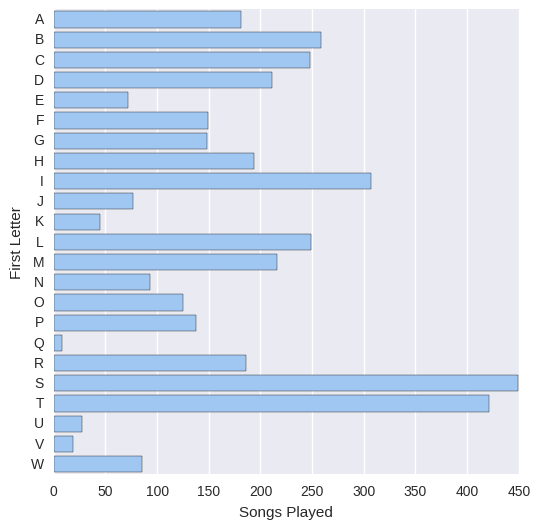

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Letter', data=playlist, color='b')
ax.set(xlabel="Songs Played", ylabel="First Letter")

In [4]:
c = playlist['Letter'].value_counts()
letters = pd.DataFrame(zip(c.keys().tolist(), c.tolist()), columns=('Letter', 'Count'))
letters_csv = path.join(data_dir, '70s_letters.csv')
letters.to_csv(letters_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (letters_csv, path.basename(letters_csv)))


### Songs by Year

Given the decade orientation this time,
it makes sense to break the songs down by year.

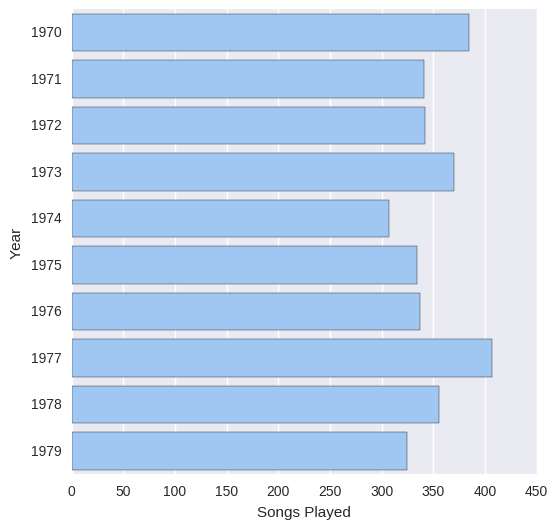

In [5]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Year', data=playlist[playlist['Year'] > 0], color='b')
ax.set(xlabel="Songs Played", ylabel="Year")

In [6]:
c = playlist['Year'].value_counts()
years = pd.DataFrame(zip(c.keys().tolist(), c.tolist()), columns=('Year', 'Count'))
years = years[years['Year'] > 0]
years_csv = path.join(data_dir, '70s_years.csv')
years.to_csv(years_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (years_csv, path.basename(years_csv)))


### Most Popular Artists

Last year's playlist was dominated by the Beatles.
This time, the date cutoffs works against them.
Over the run so far, the lead has changed a bit,
but really no one as run away with it.
Rather it's been more more even than last year.

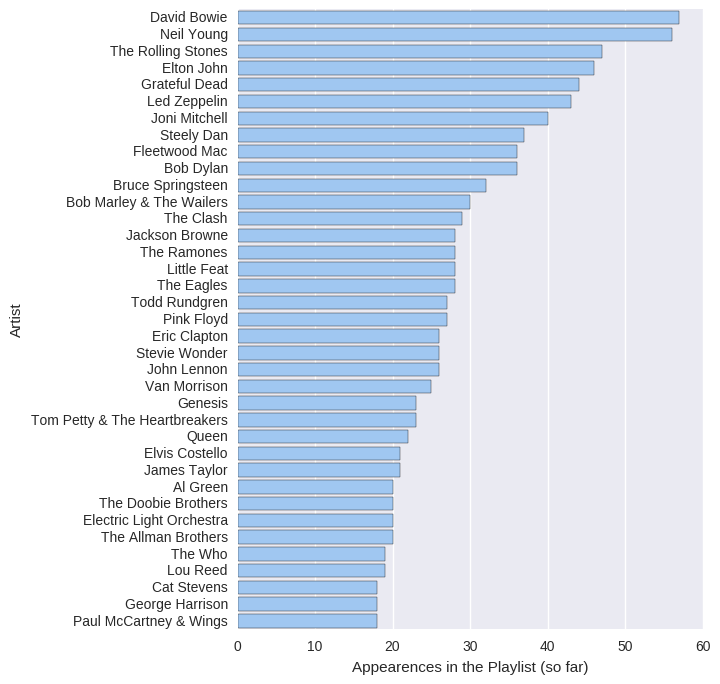

In [7]:
c = playlist['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'Count'))
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='Count', data=artists[artists['Count'] > 17], color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

In [8]:
artists_csv = path.join(data_dir, '70s_artists.csv')
artists.to_csv(artists_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (artists_csv, path.basename(artists_csv)))


### Artists Who Have Played For The Most Time

This isn't overly accurate, as it is based on the sucessive start times
in the playlist, and those only have one minute granularity.
Plus the hosts do pause to talk every few songs,
and that isn't factored out.
But it's the best we have.
Besides someone asked about this.
Playing more songs helps with total duration,
but so does long songs.

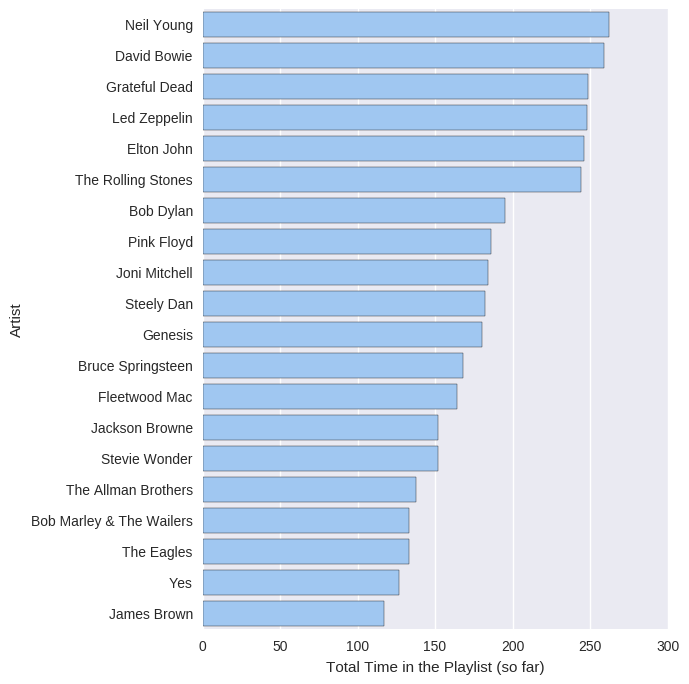

In [9]:
artist_durations = playlist.groupby('Artist')['Duration'].sum().to_frame()
artist_durations = artist_durations.reset_index()
artist_durations = artist_durations.sort_values(by='Duration', ascending=False)

f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='Duration', data=artist_durations.head(20), color='b')
ax.set(xlabel="Total Time in the Playlist (so far)")

In [10]:
artist_durations_csv = path.join(data_dir, '70s_artist_durations.csv')
artist_durations.to_csv(artist_durations_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (artist_durations_csv, path.basename(artist_durations_csv)))


#### Coverage
Has any artist played all the letters?
If not who has come closet?


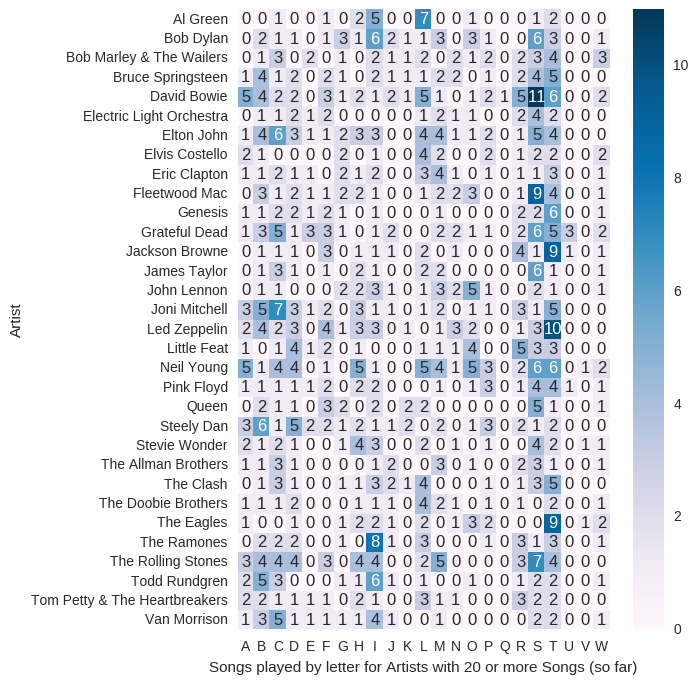

In [11]:
c = playlist[playlist.groupby('Artist')['Artist'].transform('size') >= 20]
c = c.groupby(['Artist', 'Letter']).count()
c.reset_index(level=[0,1], inplace=True)
c = c.pivot('Artist', 'Letter', 'Title').fillna(0)
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
ax = sns.heatmap(c, annot=True, cmap='PuBu')
ax.set(xlabel="Songs played by letter for Artists with 20 or more Songs (so far)")

Similarly we can look at the same for years

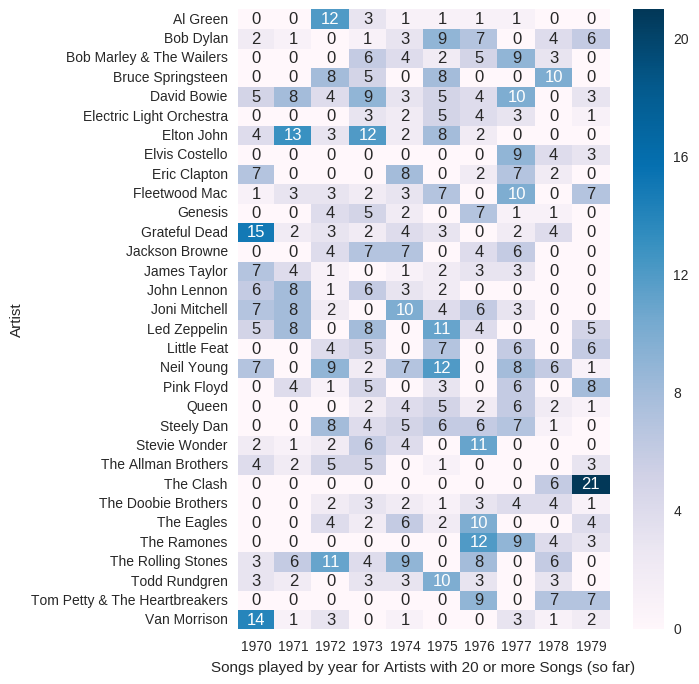

In [12]:
c = playlist[playlist.groupby('Artist')['Artist'].transform('size') >= 20]
c = c[c['Year'] > 0]
c = c.groupby(['Artist', 'Year']).count()
c.reset_index(level=[0,1], inplace=True)
c = c.pivot('Artist', 'Year', 'Title').fillna(0)
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
ax = sns.heatmap(c, annot=True, cmap='PuBu')
ax.set(xlabel="Songs played by year for Artists with 20 or more Songs (so far)")

### First words

Part of what started this last year was looking at first words.
I didn't think that would be interesting,
but when "I" took over the huge run of the letter I,
I figured it was worth watching.

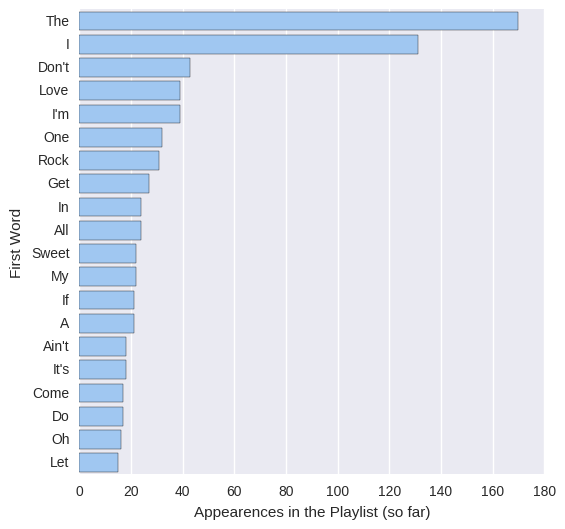

In [13]:
c = playlist['First Word'].value_counts()
words = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('First Word', 'Count'))

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='First Word', x='Count', data=words.head(20), color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

In [14]:
first_words_csv = path.join(data_dir, '70s_first_words.csv')
words.head(50).to_csv(first_words_csv, columns=['First Word', 'Count'], index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (first_words_csv, path.basename(first_words_csv)))


### Longest Songs

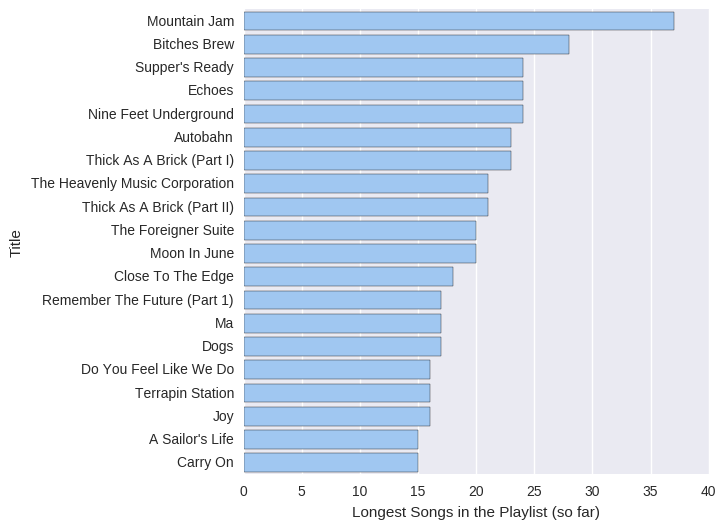

In [15]:
long_songs = playlist.sort_values(by='Duration', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='Title', x='Duration', data=long_songs.head(20), color='b')
ax.set(xlabel="Longest Songs in the Playlist (so far)")

In [16]:
long_songs_csv = path.join(data_dir, '70s_long_songs.csv')
long_songs.head(50).to_csv(long_songs_csv, columns=['Artist', 'Title', 'Duration'], index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (long_songs_csv, path.basename(long_songs_csv)))

### Duplicate Titles

Duplicate titles are not necessarily covers.
Many are.  Other times it is case of "same title, different song."
There have been fewer duplicates, Than last yer.
We didn't get the first of 2 titles with three instances
until the early Cs with "Changes," and there there were not any again until "She's Gone."
So far there as only been 4.

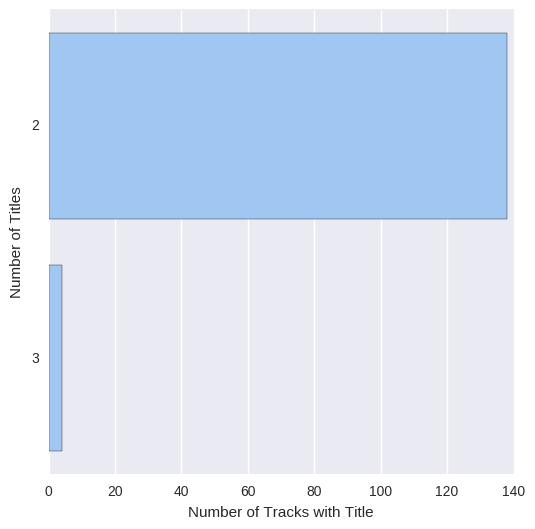

In [17]:
c = playlist['Title'].value_counts()
title_counts = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                           columns=('Title', 'Count'))

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Count', data=title_counts[title_counts['Count'] > 1], color='b')
ax.set(xlabel="Number of Tracks with Title", ylabel="Number of Titles")

In [18]:
HTML(title_counts[title_counts['Count'] > 2].sort_values(by='Title').to_html(index=False))

Title,Count
Changes,3
Cocaine,3
She's Gone,3
Take Me To The River,3


## Comparision with Previous Playlists
### Load old play lists

Consolidating [last year's playlist]('./cache/xpn/originals.csv')
we can load that and compare with this years

In [19]:

originals_file = path.join(data_dir, 'A2Z.csv')
originals = pd.read_csv(originals_file)
originals = originals.drop_duplicates()

best885_file = path.join(data_dir, '885best.csv')
best885 = pd.read_csv(best885_file)

worst88_file = path.join(data_dir, '88worst.csv')
worst88 = pd.read_csv(worst88_file)

reruns = pd.merge(playlist, originals, how='inner', on=['Title', 'Artist'])
reruns.to_csv(path.join(data_dir, 'reruns.csv'), index=False)

besties = pd.merge(playlist, best885, how='inner', on=['Title', 'Artist'])
besties.to_csv(path.join(data_dir, 'best_ones.csv'), index=False)
horrors = pd.merge(playlist, worst88, how='inner', on=['Title', 'Artist'])
horrors.to_csv(path.join(data_dir, 'horrors.csv'), index=False)

s= "<p>Only %d of %d tracks or %0.2f%% from the 70s's playlist " + \
    "were in last year's original playlist. " + \
    "Those are availiable as <a href='data/reruns.csv'>reruns.csv</a>. " + \
    "And just %d or %0.2f%% where in 2014's 885 best playlist. " + \
    "Those are availiable as <a href='data/best_ones.csv'>best_ones.csv</a>. " + \
    "Sadly %d were in 2014's 88 worst playlist." + \
    "Those are available as <a href='data/horrors.csv'>horrors.csv</a>, " +\
    " but let's look at them right now:</p>"
HTML(s %(len(reruns), len(playlist), float(len(reruns) * 100) / float(len(playlist)),
         len(besties), float(len(besties) * 100) / float(len(playlist)),
         len(horrors)))


In [20]:
HTML(horrors.to_html(index=False, columns=['Title', 'Artist']))

Title,Artist
Afternoon Delight,Starland Vocal Band
Bohemian Rhapsody,Queen
Disco Duck,Rick Dees
Feelings,Morris Albert
Free Bird,Lynyrd Skynyrd
Horse With No Name,America
Hotel California,The Eagles
Mandy,Barry Manilow
Margaritaville,Jimmy Buffett
Muskrat Love,Captain & Tennille


We do need to cut a few of the "88 worst" some slack.
Not all of them were terrible.
Some were just overplayed.
Not a few where also on the "885 best" list too, like these:

In [21]:
best_and_worst = pd.merge(horrors, best885, how='inner', on=['Title', 'Artist'])
HTML(best_and_worst.to_html(index=False, columns=['Title', 'Artist']))

Title,Artist
Bohemian Rhapsody,Queen
Free Bird,Lynyrd Skynyrd
Hotel California,The Eagles


###  Originals vs 70s

We can compare this year's play list to last years a few ways.
The simplest might be to count songs by letter.

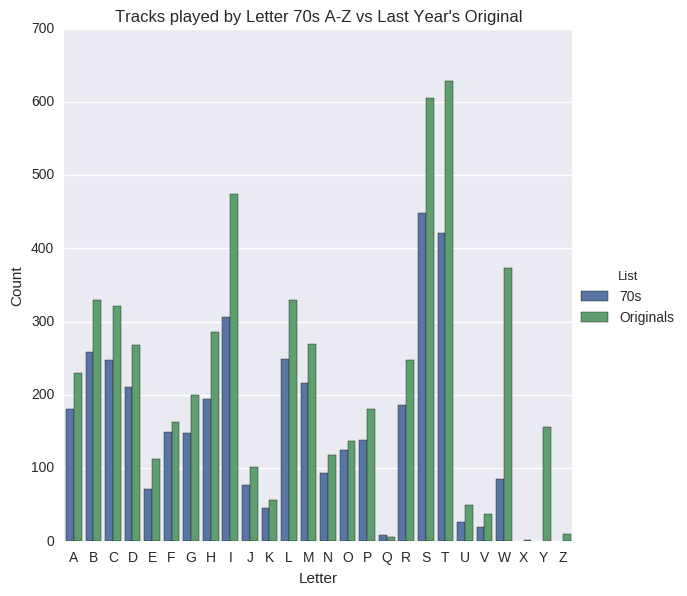

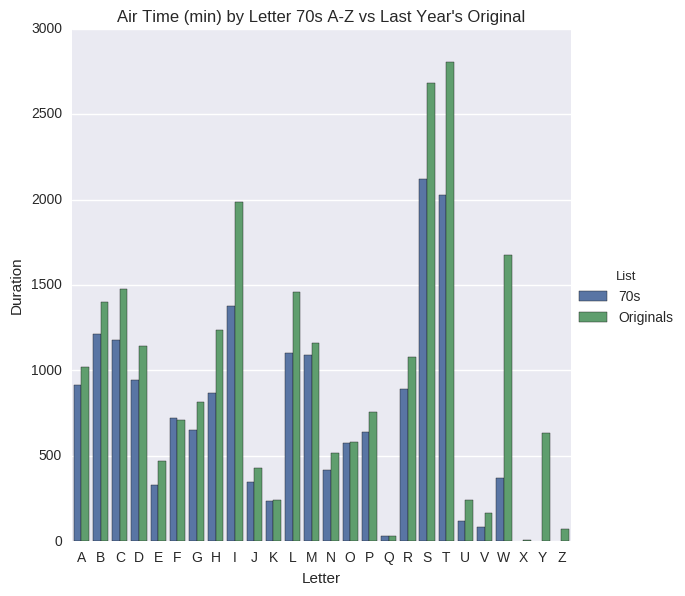

In [22]:
# there's probably a simpler way to do this
playlist['Count'] = pd.Series([1 for x in range(len(playlist.index))], index=playlist.index)
originals['Count'] = pd.Series([1 for x in range(len(originals.index))], index=originals.index)
playlist['List'] = pd.Series(['70s' for x in range(len(playlist.index))], index=playlist.index)
originals['List'] = pd.Series(['Originals' for x in range(len(originals.index))], index=originals.index)
pc = playlist.groupby(['List', 'Letter'])['Count', 'Duration'].sum()
oc = originals.groupby(['List', 'Letter'])['Count', 'Duration'].sum()
compare = pd.concat([pc, oc])
compare = compare.reset_index()

sns.set_color_codes('pastel')
sns.factorplot(y='Count', x='Letter', hue='List', data=compare, kind='bar', size=6)
sns.plt.title("Tracks played by Letter 70s A-Z vs Last Year's Original")
sns.factorplot(y='Duration', x='Letter', hue='List', data=compare, kind='bar', size=6)
sns.plt.title("Air Time (min) by Letter 70s A-Z vs Last Year's Original")

## Availability

The code for this project is in [my git hub repo](https://github.com/asudell/a2z).
The notebook its self is [published on nbviewer](http://nbviewer.jupyter.org/github/asudell/a2z/blob/master/70sAtoZ.ipynb)

## License

This project is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).
You are free to use for commercial or non-commercial purposes,
so long as you attribute the source and also allow sharing.